In [1]:
import pandas as pd
import pandas_profiling
import matplotlib
from datetime import datetime

matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
df_bc = pd.read_csv('data/dataset_betclic.csv')

In [3]:
df_bc['BirthDate'] = pd.to_datetime(df_bc['BirthDate'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df_bc['FirstDepositDate'] = pd.to_datetime(df_bc['FirstDepositDate'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df_bc['BetDate'] = pd.to_datetime(df_bc['BetDate'], format='%Y%m%d')

## Description de la donnée

In [4]:
df_bc.head()

,UserId,Country,Gender,BirthDate,PartnerType,FirstDepositDate,BetDate,BetId,Application,ProductName,IsLive,BetAmount,AmountWon,Odds,Cashout
0,10783501,Portugal,M,1992-06-08,PPC,2017-01-03,2017-01-03,607023702,BETCLIC.PT,SportsBook,False,5.00,0.0,124.76,0.0
1,10782912,Ivory Coast,M,1996-03-18,Internal,2017-01-03,2017-01-03,607023878,BETCLIC.COM,SportsBook,False,5.00,23.0,4.60,0.0
2,10780813,France,F,1998-04-05,PPC,2017-01-01,2017-01-03,607024082,BETCLIC.FR,SportsBook,False,5.00,0.0,8.00,0.0
3,10783215,Portugal,M,1976-12-17,Internal,2017-01-03,2017-01-03,607024088,BETCLIC.PT,SportsBook,False,1.00,0.0,41.08,0.0
4,10783401,Poland,M,1995-04-16,Affiliation,2017-01-03,2017-01-03,607024113,EXPEKT.COM,SportsBook,False,5.67,0.0,3.75,0.0


In [5]:
# Tres verbeux mais toujours tres interessant : (je prefere ne pas le lancer ici et explorer à la main)
#pandas_profiling.ProfileReport(df_bc)

In [6]:
df_bc.columns

Index(['UserId', 'Country', 'Gender', 'BirthDate', 'PartnerType',
       'FirstDepositDate', 'BetDate', 'BetId', 'Application', 'ProductName',
       'IsLive', 'BetAmount', 'AmountWon', 'Odds', 'Cashout'],
      dtype='object')

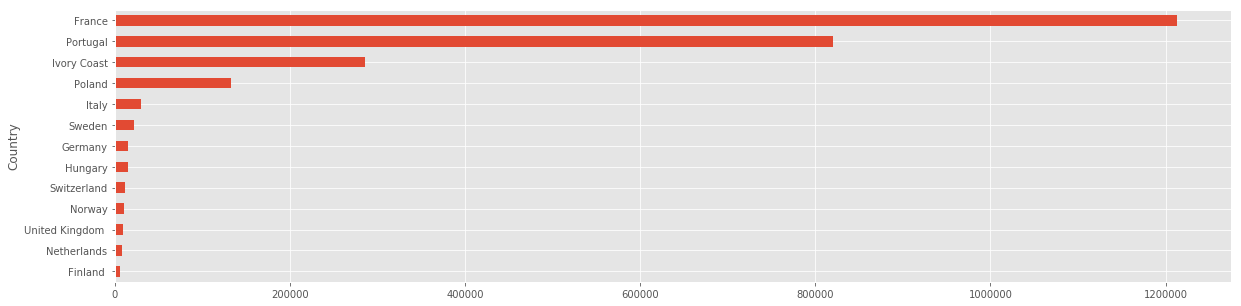

In [7]:
df_bc.groupby('Country')['UserId'].count().sort_values(ascending=True).plot(kind='barh', figsize=(20, 5))

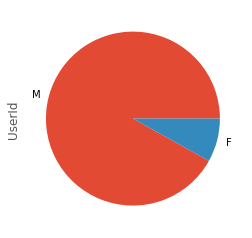

In [41]:
df_bc.groupby('Gender')['UserId'].count().sort_values(ascending=False).plot(kind='pie')

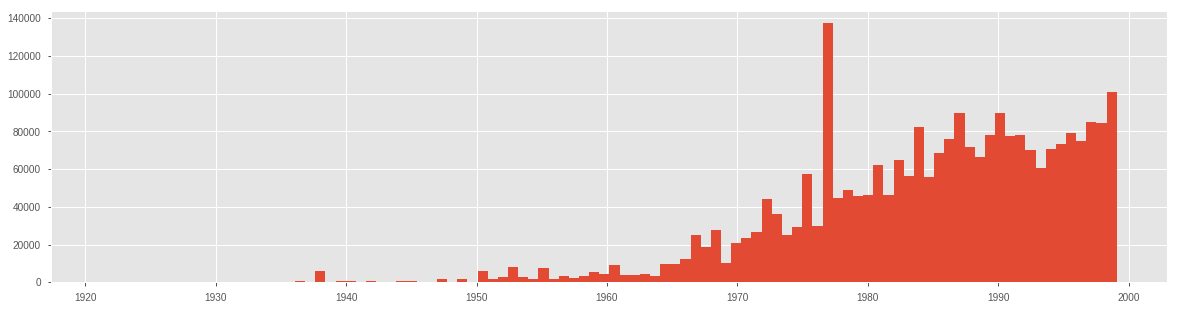

In [67]:
df_bc['BirthDate'].hist(bins=100, figsize=(20, 5))

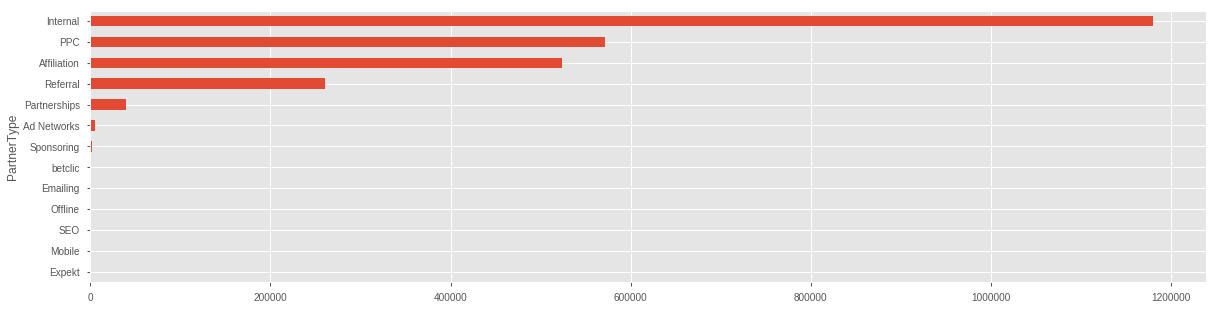

In [68]:
df_bc.groupby('PartnerType')['UserId'].count().sort_values(ascending=True).plot(kind='barh', figsize=(20, 5))

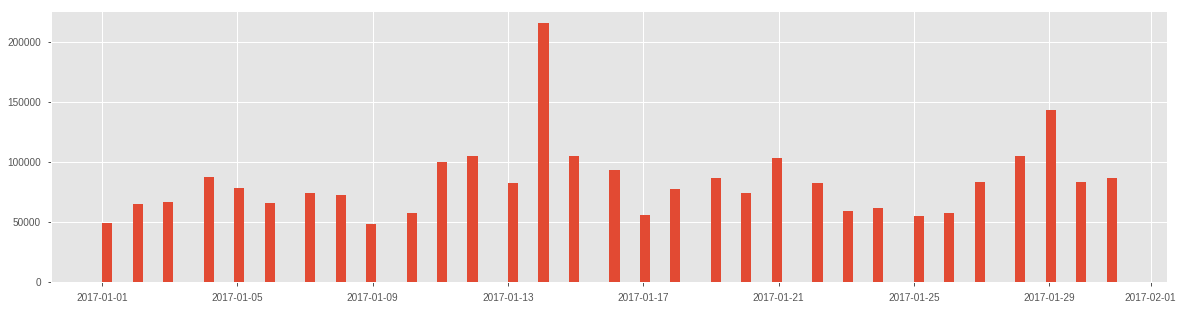

In [75]:
df_bc['FirstDepositDate'].hist(bins=100, figsize=(20, 5))

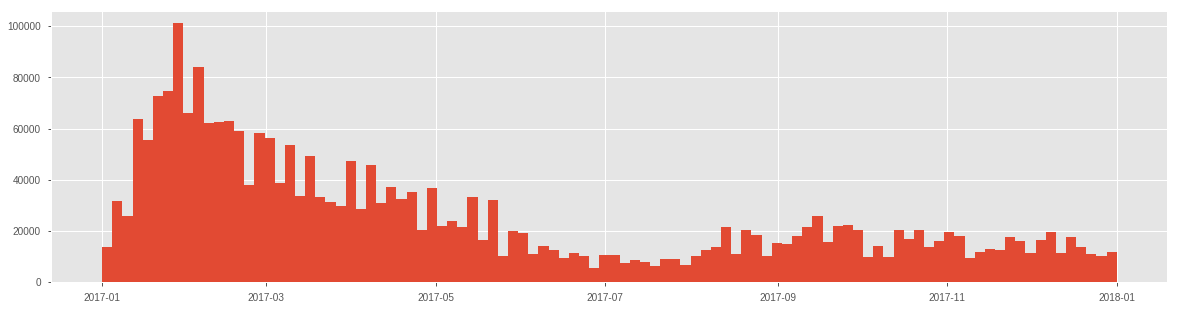

In [70]:
df_bc['BetDate'].hist(bins=100, figsize=(20, 5))

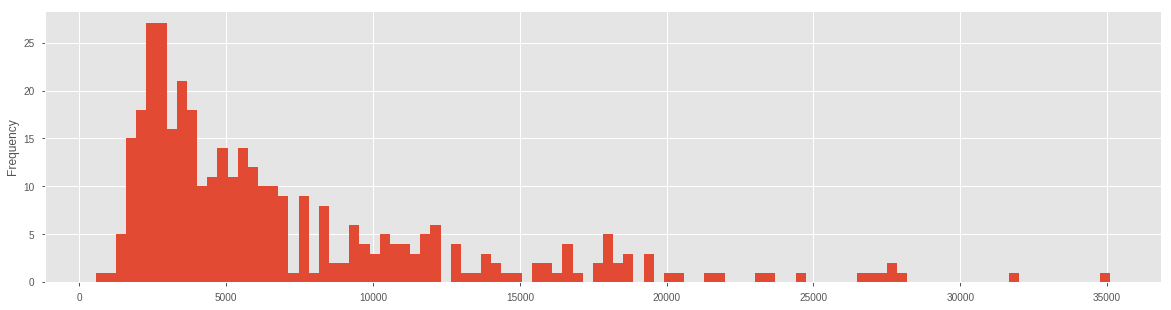

In [80]:
df_bc.groupby('BetDate')['BetId'].count().plot(kind='hist', bins=100, figsize=(20, 5))

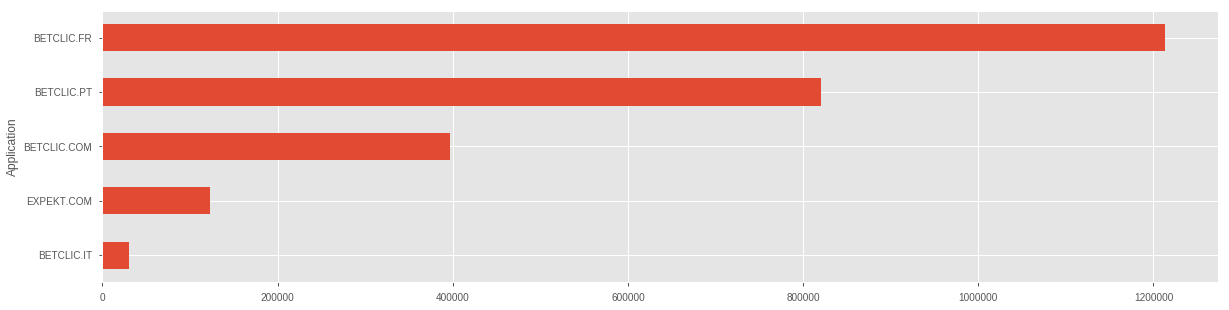

In [81]:
df_bc.groupby('Application')['UserId'].count().sort_values(ascending=True).plot(kind='barh', figsize=(20, 5))

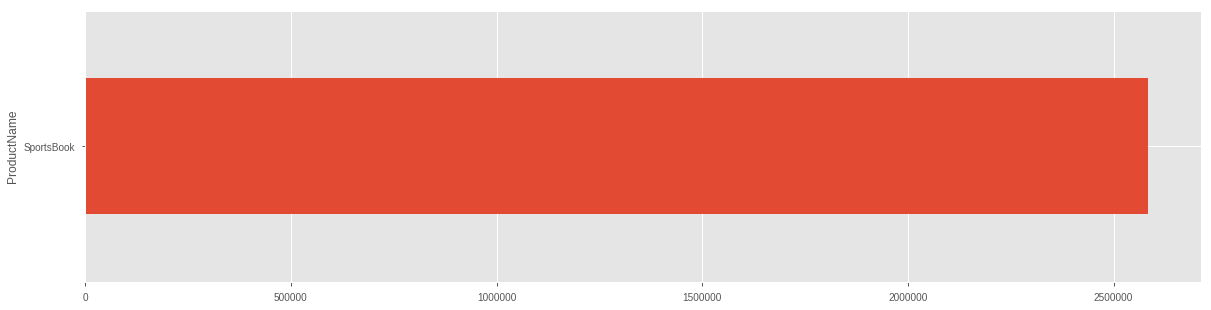

In [82]:
df_bc.groupby('ProductName')['UserId'].count().sort_values(ascending=True).plot(kind='barh', figsize=(20, 5))

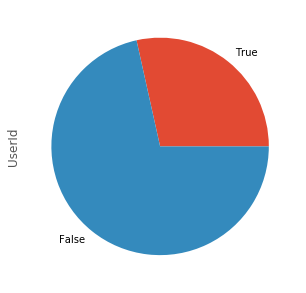

In [42]:
df_bc.groupby('IsLive')['UserId'].count().sort_values(ascending=True).plot(kind='pie', figsize=(20, 5))

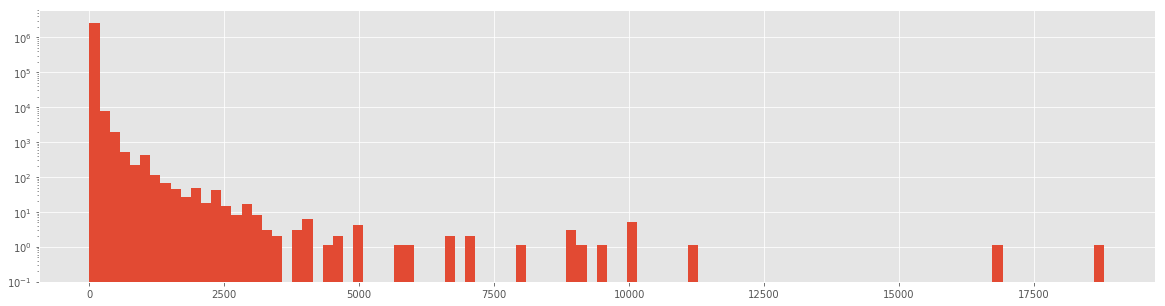

In [12]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df_bc['BetAmount'].hist(ax=ax, bins=100, bottom=0.1, figsize=(20, 5))
ax.set_yscale('log')

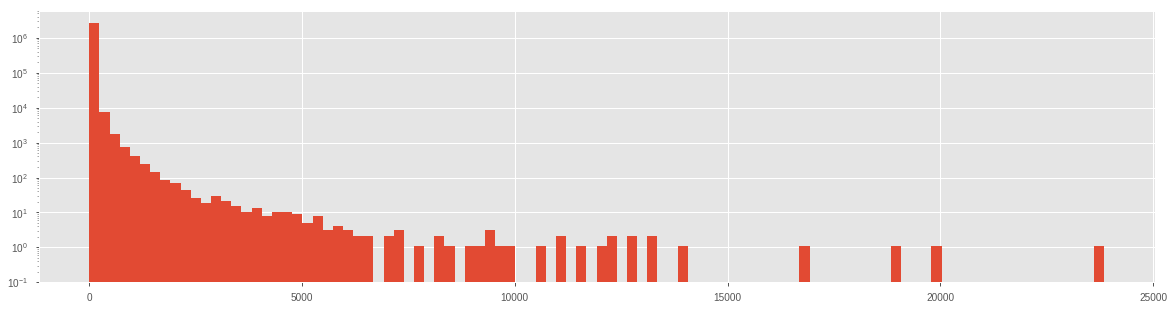

In [90]:
fig, ax = plt.subplots()
df_bc['AmountWon'].hist(ax=ax, bins=100, bottom=0.1, figsize=(20, 5))
ax.set_yscale('log')

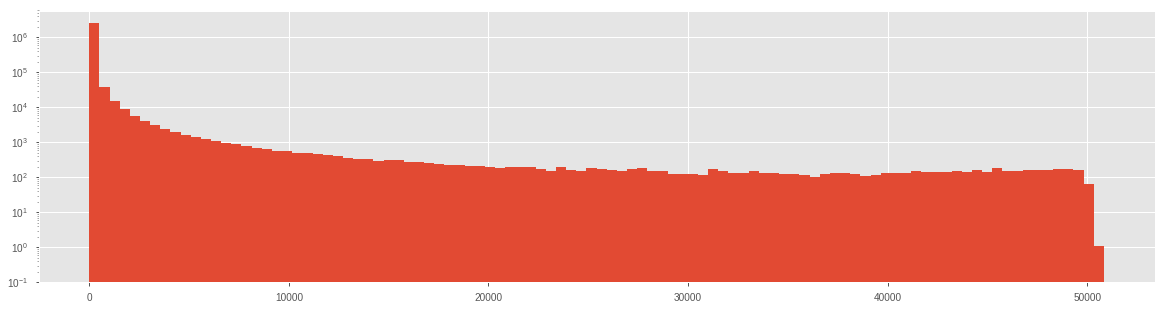

In [92]:
fig, ax = plt.subplots()
df_bc['Odds'].hist(ax=ax, bins=100, bottom=0.1, figsize=(20, 5))
ax.set_yscale('log')

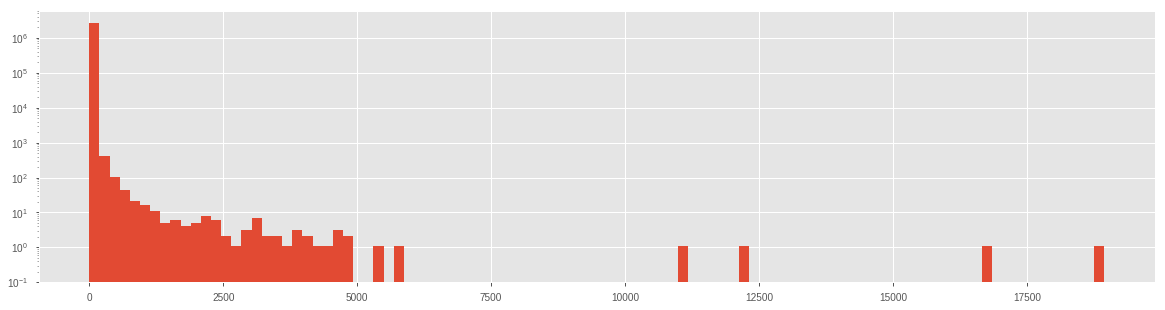

In [94]:
fig, ax = plt.subplots()
df_bc['Cashout'].hist(ax=ax, bins=100, bottom=0.1, figsize=(20, 5))
ax.set_yscale('log')

## Analyse

### quel est l'age moyen d'un client ?


In [107]:
(df_bc.drop_duplicates(subset='UserId')['BirthDate'] - df_bc.drop_duplicates(subset='UserId')['BirthDate'].min()).mean() + df_bc.drop_duplicates(subset='UserId')['BirthDate'].min()

Timestamp('1988-05-17 03:48:01.834728960')

In [114]:
now = pd.Timestamp(datetime.now())
(now - df_bc.drop_duplicates(subset='UserId')['BirthDate']).astype('<m8[Y]').mean()


30.23415443109655

### quel est le nombre moyen de paris par client ?

In [154]:
df_bc.groupby('UserId')['BetId'].count().mean()

104.50810985721797

### combien un client pari en moyenne ?

In [121]:
df_bc.groupby(['UserId', 'BetId'])['BetAmount'].sum().mean()

8.323373382295683

### combien un client gagne en moyenne ?

In [122]:
df_bc.groupby(['UserId', 'BetId'])['AmountWon'].sum().mean()

6.850836186417133

### argent entré par le client ?

In [126]:
df_bc.drop_duplicates(subset='BetId')['BetAmount'].sum()

21505549.27

### argent gagné par le client ?

In [127]:
df_bc.drop_duplicates(subset='BetId')['AmountWon'].sum() 

17700875.400000013

### argent gagné par betclic ?

In [125]:
df_bc.drop_duplicates(subset='BetId')['BetAmount'].sum() - df_bc.drop_duplicates(subset='BetId')['AmountWon'].sum() 

3804673.869999986

### combien un client depense par mois en pari ?

### combien de paris par jours en moyenne ?

In [129]:
df_bc.groupby(['BetDate'])['BetId'].count().mean()

7059.437158469946

### combien de paris par mois ?


### Les femmes gagnent t elles plus que les hommes ?

In [143]:
df_bc.groupby(['Gender', 'BetId'])['AmountWon'].sum().reset_index().groupby('Gender')['AmountWon'].mean()

Gender
F    6.513041
M    6.880524
Name: AmountWon, dtype: float64

### quel pays gagne le plus en proportion ?

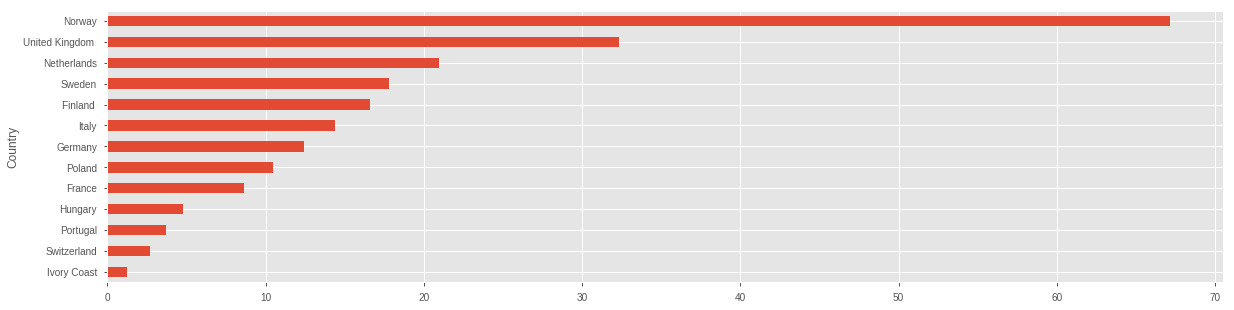

In [152]:
df_bc.groupby(['Country', 'BetId'])['AmountWon'].sum().reset_index().groupby('Country')['AmountWon'].mean().sort_values(ascending=True).plot(kind='barh', figsize=(20, 5))

### Quel pays joue le plus ?

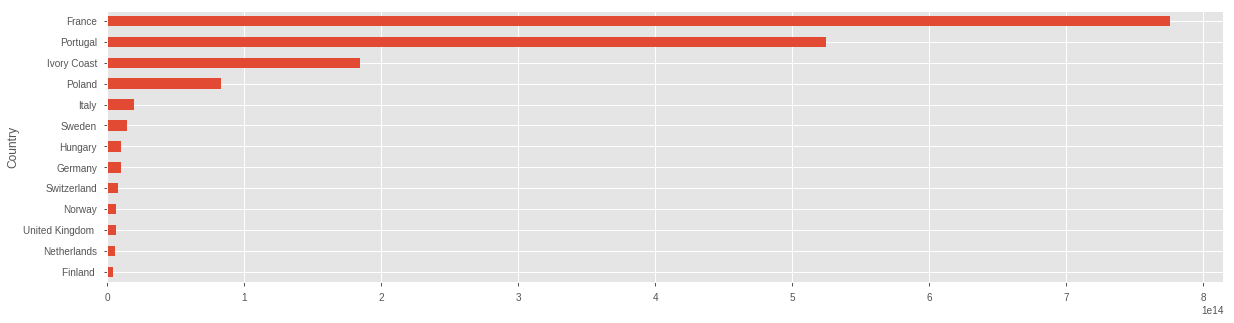

In [153]:
df_bc.groupby(['Country'])['BetId'].sum().sort_values(ascending=True).plot(kind='barh', figsize=(20, 5))

## Prediction
If the average lifetime of a customer is 90 days since their first deposit :  
build a model to predict the Lifetime Value of a customer given his first 15 days of activity. What other data could be pertinent to answer this question? Given the data provided is the assumption of 90 days valid? 

### I consider the Lifetime Value of a customer the amount he lost during his active lifetime on Betclic 
$BetAmount - AmountWon$

## Lifetime

$max(BetDate) - min(FirstDepositDate)$

In [35]:
df_max_BetDate = df_bc.groupby(['UserId'])['BetDate'].max().reset_index()
df_max_BetDate.columns = ['UserId', 'max_BetDate']

df_min_FirstDepositDate = df_bc.groupby(['UserId'])['FirstDepositDate'].min().reset_index()
df_min_FirstDepositDate.columns = ['UserId', 'min_FirstDepositDate']

df_ltv = pd.merge(df_bc, 
                  df_max_BetDate, 
                  how='left', 
                  left_on=['UserId'], 
                  right_on=['UserId'])

df_ltv = pd.merge(df_ltv, 
                  df_min_FirstDepositDate, 
                  how='left', 
                  left_on=['UserId'], 
                  right_on=['UserId'])

df_ltv['lifetime'] = df_ltv['max_BetDate'] - df_ltv['min_FirstDepositDate']

df_ltv.head()

,UserId,Country,Gender,BirthDate,PartnerType,FirstDepositDate,BetDate,BetId,Application,ProductName,IsLive,BetAmount,AmountWon,Odds,Cashout,max_BetDate,min_FirstDepositDate,lifetime
0,10783501,Portugal,M,1992-06-08,PPC,2017-01-03,2017-01-03,607023702,BETCLIC.PT,SportsBook,False,5.00,0.0,124.76,0.0,2017-09-10,2017-01-03,250 days
1,10782912,Ivory Coast,M,1996-03-18,Internal,2017-01-03,2017-01-03,607023878,BETCLIC.COM,SportsBook,False,5.00,23.0,4.60,0.0,2017-10-21,2017-01-03,291 days
2,10780813,France,F,1998-04-05,PPC,2017-01-01,2017-01-03,607024082,BETCLIC.FR,SportsBook,False,5.00,0.0,8.00,0.0,2017-09-04,2017-01-01,246 days
3,10783215,Portugal,M,1976-12-17,Internal,2017-01-03,2017-01-03,607024088,BETCLIC.PT,SportsBook,False,1.00,0.0,41.08,0.0,2017-11-19,2017-01-03,320 days
4,10783401,Poland,M,1995-04-16,Affiliation,2017-01-03,2017-01-03,607024113,EXPEKT.COM,SportsBook,False,5.67,0.0,3.75,0.0,2017-01-09,2017-01-03,6 days


In [38]:
df_ltv.drop_duplicates(subset='UserId')['lifetime'].mean()

Timedelta('98 days 01:44:26.035675')

## Value

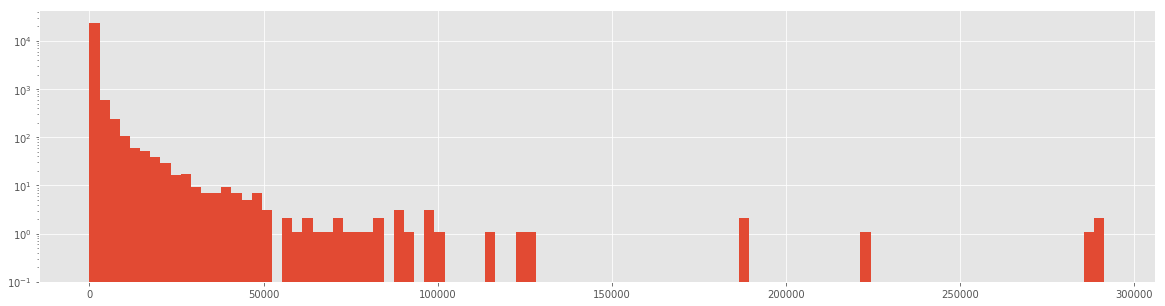

In [13]:
fig, ax = plt.subplots()
df_bc.groupby(['UserId'])['BetAmount'].sum().hist(ax=ax, bins=100, bottom=0.1, figsize=(20, 5))
ax.set_yscale('log')

In [45]:
df_Value = df_bc.groupby(['UserId'])['BetAmount'].sum().reset_index()
df_Value.columns = ['UserId', 'Value']

df_ltv = pd.merge(df_ltv, 
                  df_Value, 
                  how='left', 
                  left_on=['UserId'], 
                  right_on=['UserId'])

df_ltv.head()

,UserId,Country,Gender,BirthDate,PartnerType,FirstDepositDate,BetDate,BetId,Application,ProductName,IsLive,BetAmount,AmountWon,Odds,Cashout,max_BetDate,min_FirstDepositDate,lifetime,Value
0,10783501,Portugal,M,1992-06-08,PPC,2017-01-03,2017-01-03,607023702,BETCLIC.PT,SportsBook,False,5.00,0.0,124.76,0.0,2017-09-10,2017-01-03,250 days,30.00
1,10782912,Ivory Coast,M,1996-03-18,Internal,2017-01-03,2017-01-03,607023878,BETCLIC.COM,SportsBook,False,5.00,23.0,4.60,0.0,2017-10-21,2017-01-03,291 days,1044.00
2,10780813,France,F,1998-04-05,PPC,2017-01-01,2017-01-03,607024082,BETCLIC.FR,SportsBook,False,5.00,0.0,8.00,0.0,2017-09-04,2017-01-01,246 days,966.71
3,10783215,Portugal,M,1976-12-17,Internal,2017-01-03,2017-01-03,607024088,BETCLIC.PT,SportsBook,False,1.00,0.0,41.08,0.0,2017-11-19,2017-01-03,320 days,503.30
4,10783401,Poland,M,1995-04-16,Affiliation,2017-01-03,2017-01-03,607024113,EXPEKT.COM,SportsBook,False,5.67,0.0,3.75,0.0,2017-01-09,2017-01-03,6 days,186.77


In [14]:
df_bc.groupby(['UserId'])['BetAmount'].sum().mean()

869.8600198196018

In [16]:
df_bc.groupby(['UserId'])['BetAmount'].sum().median()

110.0

In [15]:
df_bc.groupby(['UserId'])['BetAmount'].sum().describe()

count     24723.000000
mean        869.860020
std        5450.787634
min           0.060000
25%          50.270000
50%         110.000000
75%         376.850000
max      291345.500000
Name: BetAmount, dtype: float64

In [53]:
df_ltv['lifetime_int'] = df_ltv['lifetime'].dt.days

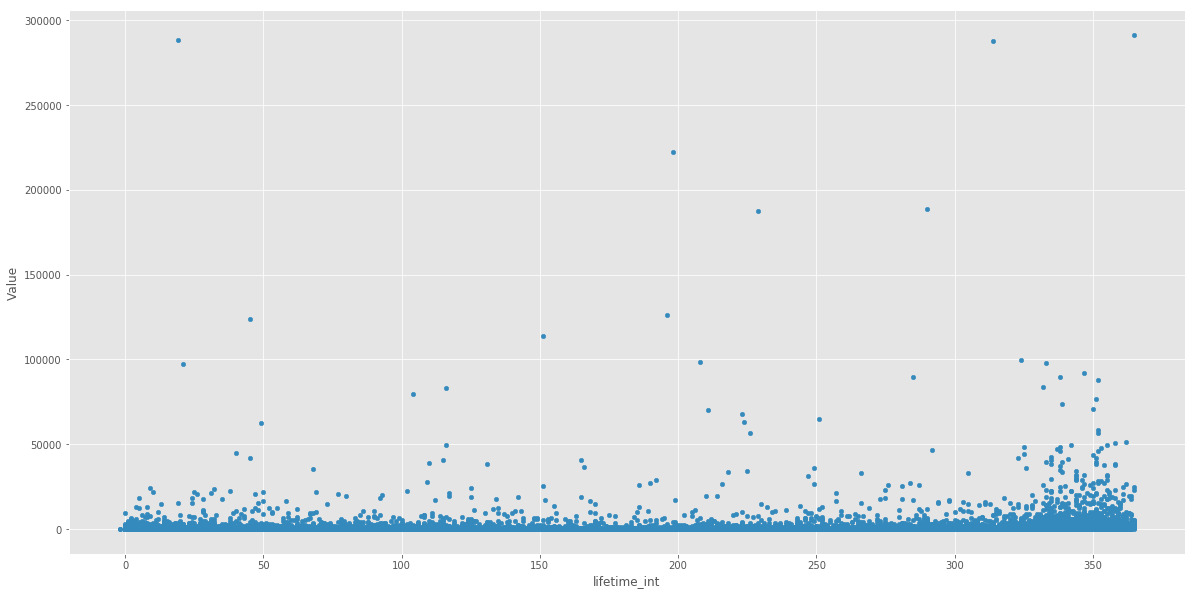

In [56]:
df_ltv.drop_duplicates(subset='UserId')[['lifetime_int', 'Value']].plot(kind='scatter', x='lifetime_int', y='Value', figsize=(20, 10))

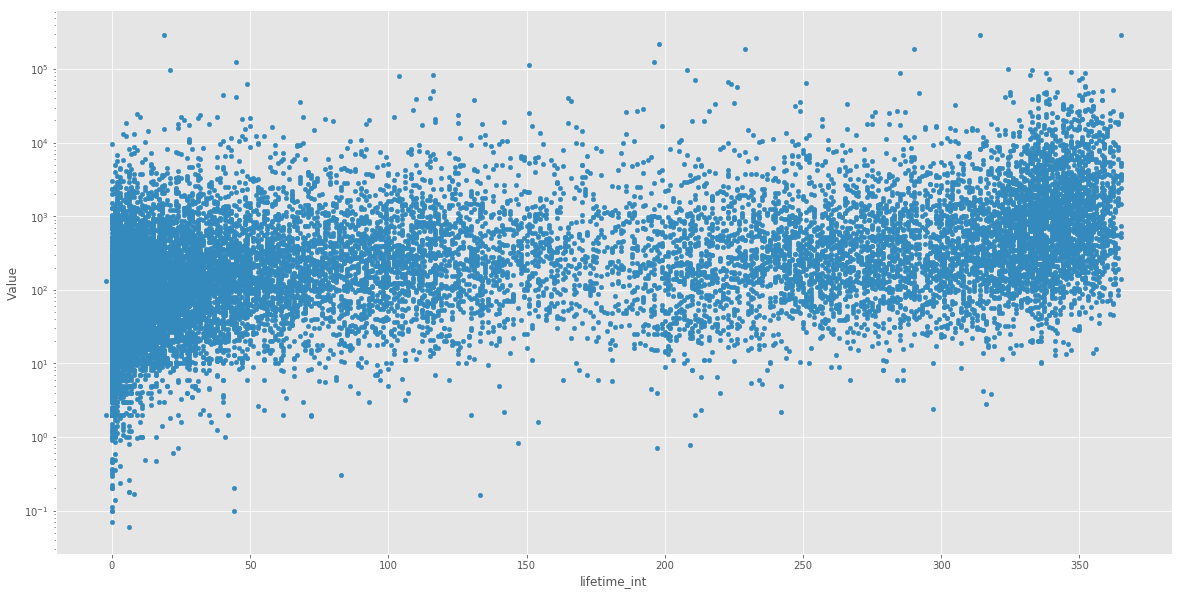

In [58]:
fig, ax = plt.subplots()
df_ltv.drop_duplicates(subset='UserId')[['lifetime_int', 'Value']].plot(kind='scatter', ax=ax, x='lifetime_int', y='Value', figsize=(20, 10))
ax.set_yscale('log')

### additionnal features
- freq_bet
- ratio_win
- insee_iris

### Robust scaler on amount data